In [7]:
!pip install faker
from faker import Faker
import pandas as pd
import random



In [8]:
class User(object):
    f = Faker()
    def __init__(self):
        self.name   = User.f.name()
        self.age           = User.f.pyint(min_value=5, max_value=85)
        self.address = User.f.address()
        self.sex = random.choice(['Male', 'Female'])
        #self.private_email = unidecode.unidecode("{}.{}@{}".format(self.first_name, self.last_name, User.f.free_email_domain()).lower())


data = [User().__dict__ for i in range(500)]
df = pd.DataFrame(data)

df.head()

,name,age,address,sex
0,Jennifer Gamble,35,"38530 Tracy Glens\nRogersshire, ID 25248",Female
1,James Hubbard,78,"461 Daniel Hills\nGarciabury, PA 70126",Male
2,Curtis Smith,58,"3539 Moore Isle Apt. 483\nNew Aarontown, WI 87936",Female
3,Kevin Fisher,45,"0888 Mendez Pines\nWest Jerryborough, NY 02607",Male
4,Lori Ramos,68,"3612 Larry Lights Apt. 734\nBrownfort, NM 58955",Male


In [9]:
import pyspark
from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('Create Data').getOrCreate()
# df1 = spark.createDataFrame(df, schema=schema)

In [10]:
spark = SparkSession.builder.appName('Create Random Data').getOrCreate()

In [17]:
df1 = spark.createDataFrame(df)
df1.coalesce(1).write.csv("datainput.csv", mode='overwrite', header = True)

In [18]:
df2 = spark.read.format("csv").option("header", "true").load("datainput.csv")

df2.write.parquet("Data Input")


In [19]:
df3 = spark.read.parquet("Data Input")
df3.show()

+-----------------+----------+--------------------+----+
|             name|       age|             address| sex|
+-----------------+----------+--------------------+----+
|  Jennifer Gamble|        35|   38530 Tracy Glens|NULL|
|      Rogersshire| ID 25248"|              Female|NULL|
|    James Hubbard|        78|    461 Daniel Hills|NULL|
|       Garciabury| PA 70126"|                Male|NULL|
|     Curtis Smith|        58|3539 Moore Isle A...|NULL|
|    New Aarontown| WI 87936"|              Female|NULL|
|     Kevin Fisher|        45|   0888 Mendez Pines|NULL|
|West Jerryborough| NY 02607"|                Male|NULL|
|       Lori Ramos|        68|3612 Larry Lights...|NULL|
|        Brownfort| NM 58955"|                Male|NULL|
|  Matthew Stevens|        12|    430 Gibson Vista|NULL|
|  New Denisehaven| IL 35532"|              Female|NULL|
|Christina Hawkins|        40|    0364 Webb Groves|NULL|
|  Port Aprilville| OR 82610"|              Female|NULL|
|    Amanda Greene|        83|7

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

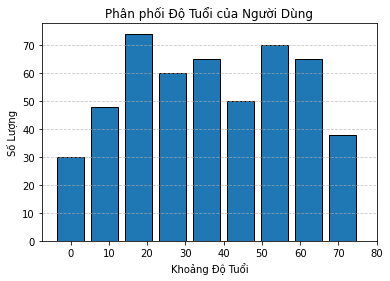

In [21]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_range'] = pd.cut(df['age'], bins=age_ranges, right=False, labels=False)

# Tạo histogram
plt.hist(df['age_range'], bins=len(age_ranges)-1, edgecolor='k', align='left', rwidth=0.8)
plt.xticks(range(len(age_ranges)-1), age_ranges[:-1])
plt.xlabel('Khoảng Độ Tuổi')
plt.ylabel('Số Lượng')
plt.title('Phân phối Độ Tuổi của Người Dùng')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<AxesSubplot:ylabel='sex'>

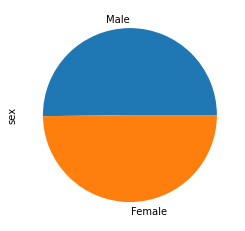

In [22]:
df['sex'].value_counts().plot.pie()

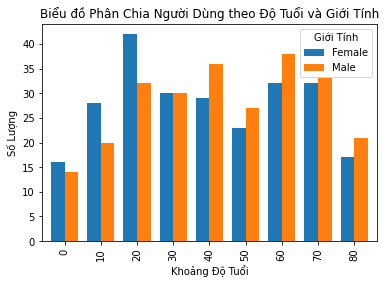

In [23]:
age_ranges = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['age_range'] = pd.cut(df['age'], bins=age_ranges, right=False, labels=age_ranges[:-1])

# Tạo DataFrame mới với cột 'age_range' làm chỉ mục
age_gender_counts = df.groupby(['age_range', 'sex']).size().unstack(fill_value=0)

# Tạo biểu đồ phân chia người dùng theo từng khoảng độ tuổi
age_gender_counts.plot(kind='bar', stacked=False, width =  0.75)
plt.xlabel('Khoảng Độ Tuổi')
plt.ylabel('Số Lượng')
plt.title('Biểu đồ Phân Chia Người Dùng theo Độ Tuổi và Giới Tính')
plt.xticks(range(len(age_ranges)-1), age_ranges[:-1])
plt.legend(title='Giới Tính', labels=['Female', 'Male'])
plt.show()